## Stock Market📈 Prediction🤔 with Linear Regression

** I fetch Stock data from Quandl website using Quandl Library **

In [1]:
#For Quandl installation in your kernel 
!pip install Quandl

Defaulting to user installation because normal site-packages is not writeable


In [78]:
import numpy as np

In [79]:
import pandas as pd #For data related tasks

import matplotlib.pyplot as plt #for data visualization 
import quandl #Stock market API for fetching Data
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import datetime as dt


** Now with Quandl API we will fetch TCS stock data of 1 Month for our prediction**

In [90]:
quandl.ApiConfig.api_key = '-NbnYzgwsjsficqNMggT'## enter your key 

start_date='2023-12-01'
end_date='2023-12-31'


start_date=start_date.replace('2023','2018')
end_date=end_date.replace('2023','2018')

stock_data = quandl.get('NSE/TCS', start_date=start_date, end_date=end_date)
dataset = pd.DataFrame(stock_data)
dataset.to_csv('TCS.csv')
data = pd.read_csv('TCS.csv')



#Let's see the data
data['Date']=data['Date'].str.replace('2018','2023')
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2023-12-03,1984.00,1990.00,1968.30,1984.00,1982.40,1610576.0,31868.00
1,2023-12-04,1983.00,2019.40,1971.00,2009.85,2010.85,3270615.0,65568.23
2,2023-12-05,2006.00,2018.00,1985.00,2003.90,2006.75,2501539.0,50131.23
3,2023-12-06,1998.00,2017.00,1979.60,1990.00,1992.70,2321216.0,46373.71
4,2023-12-07,1985.05,2003.90,1973.00,1999.85,1995.20,1680420.0,33463.26
5,2023-12-10,1975.00,2011.00,1960.00,1961.00,1975.80,2010786.0,39990.73
6,2023-12-11,1970.00,2010.00,1961.00,1997.05,2000.00,2942014.0,58636.26
7,2023-12-12,2001.10,2022.00,1984.95,2016.50,2016.80,2219993.0,44663.42
8,2023-12-13,2024.00,2029.70,1974.50,1981.95,1982.60,3748429.0,74802.38
9,2023-12-14,1983.00,1998.95,1975.25,1989.00,1989.75,2473761.0,49094.42


** Now with Panas we have to convert this data into Dataframe **

In [91]:
Day=pd.to_datetime(data['Date']).dt.day
Year=pd.to_datetime(data['Date']).dt.year
Month=pd.to_datetime(data['Date']).dt.month


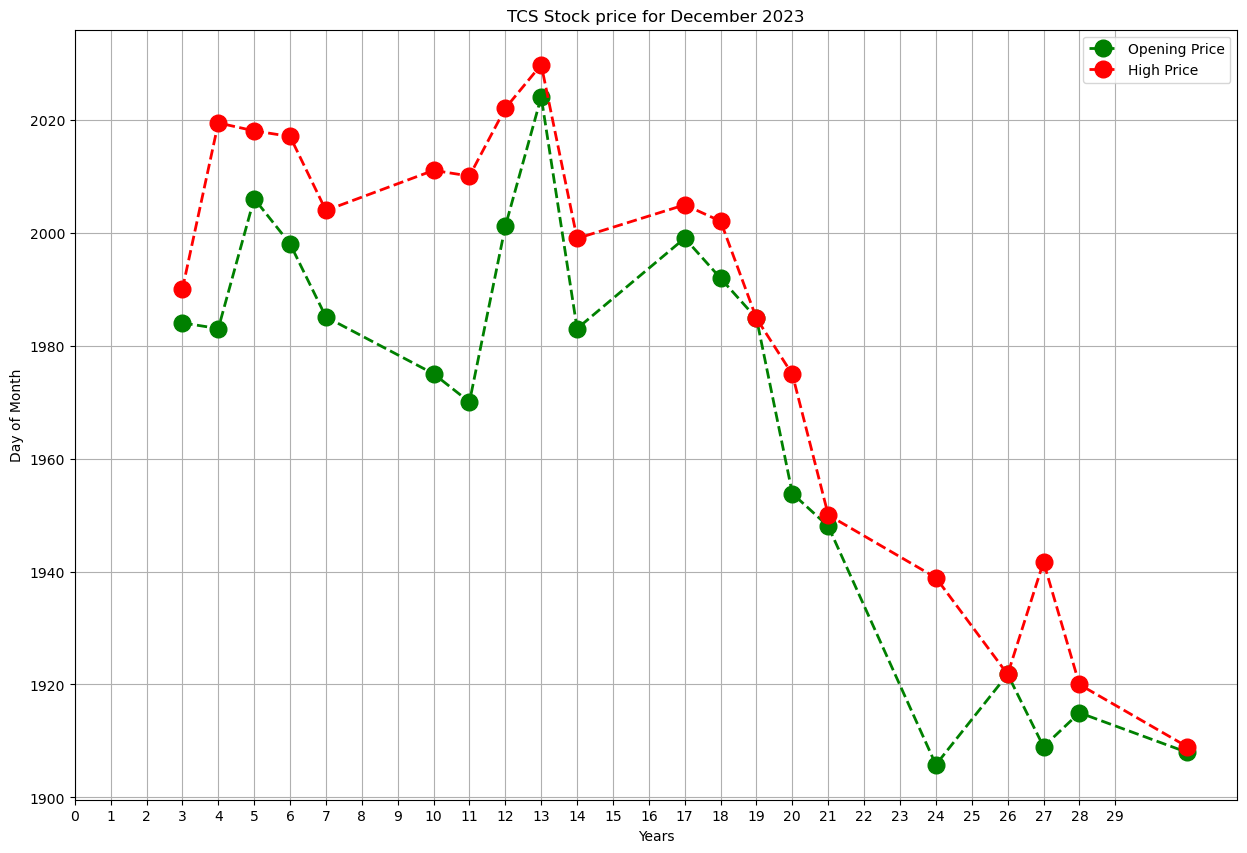

In [92]:
plt.figure(figsize=(15,10))
plt.plot(Day,data['Open'],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12,label='Opening Price')
plt.plot(Day,data['High'],color='red', marker='o', linestyle='dashed',linewidth=2, markersize=12,label='High Price')
plt.xticks(np.arange(0, 30, step=1),rotation=0)

#plt.tight_layout()
plt.title('TCS Stock price for December 2023')

plt.xlabel('Years')
plt.ylabel('Day of Month')

plt.legend()
plt.grid()
plt.show()

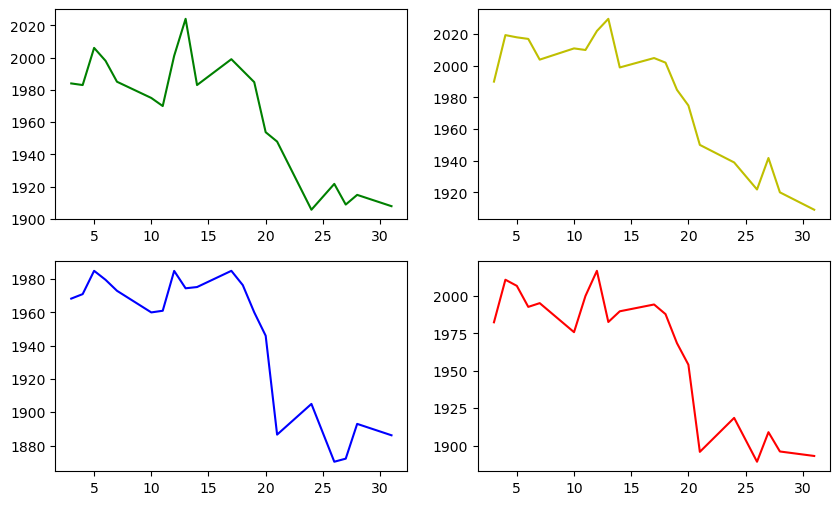

In [93]:
fig, ax = plt.subplots(2,2,figsize=(10,6))
ax[0][0].plot(Day,data['Open'], 'g') #row=0,col=0 
ax[0][1].plot(Day,data['High'], color='y') #row=0,col=1
 
ax[1][0].plot(Day,data['Low'], 'b') #row=1,col=0
ax[1][1].plot(Day,data['Close'], 'red') #row=1,col=1

In [94]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2023-12-03,1984.00,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2023-12-04,1983.00,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2023-12-05,2006.00,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2023-12-06,1998.00,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2023-12-07,1985.05,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


** Let's check NULL values **

In [95]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

** Now see some correalations between data ** 

In [96]:
data.corr()

C:\Users\AkshayDureja(Annalec\AppData\Local\Temp\ipykernel_29148\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.937777,0.925625,0.889651,0.886413,-0.145327,-0.091618
High,0.937777,1.000000,0.935803,0.946352,0.956137,-0.064046,-0.005265
Low,0.925625,0.935803,1.000000,0.964793,0.968353,-0.353678,-0.297565
Last,0.889651,0.946352,0.964793,1.000000,0.995482,-0.220357,-0.162985
Close,0.886413,0.956137,0.968353,0.995482,1.000000,-0.223675,-0.165647
Total Trade Quantity,-0.145327,-0.064046,-0.353678,-0.220357,-0.223675,1.000000,0.998061
Turnover (Lacs),-0.091618,-0.005265,-0.297565,-0.162985,-0.165647,0.998061,1.000000


C:\Users\AkshayDureja(Annalec\AppData\Local\Temp\ipykernel_29148\478821725.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = sns.heatmap(data.corr(), annot = True)


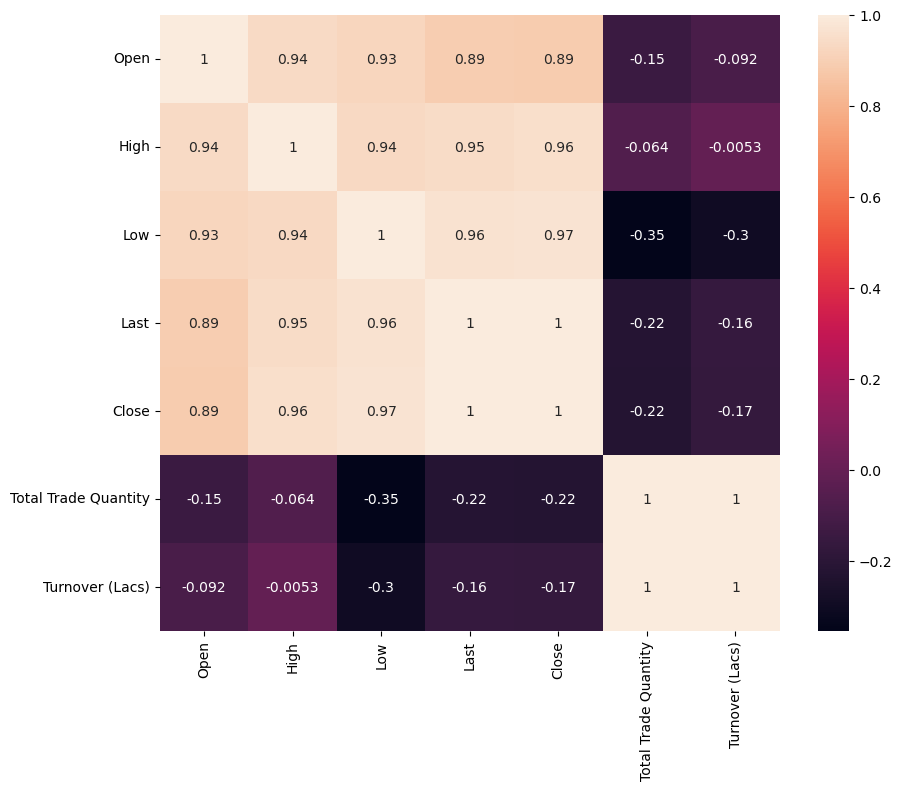

In [97]:
import seaborn as sns
plt.figure(figsize = (10 , 8))
cor = sns.heatmap(data.corr(), annot = True)

** Now we have to divide data in Dependent and Independent variable**

** We can see Date column in useul for our prediction but for simplicity we have to remove it because date format is not proper ** 

** Now we have to predict open price so this column is out dependent variable because open price depend on High,Low,Close,Last,Turnover etc... **

In [98]:
#Let's select our features
x = data.loc[:,'High':'Turnover (Lacs)']
y = data.loc[:,'Open']

In [99]:
x.head()

,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1990.0,1968.3,1984.00,1982.40,1610576.0,31868.00
1,2019.4,1971.0,2009.85,2010.85,3270615.0,65568.23
2,2018.0,1985.0,2003.90,2006.75,2501539.0,50131.23
3,2017.0,1979.6,1990.00,1992.70,2321216.0,46373.71
4,2003.9,1973.0,1999.85,1995.20,1680420.0,33463.26


In [100]:
y.head()

0    1984.00
1    1983.00
2    2006.00
3    1998.00
4    1985.05
Name: Open, dtype: float64

** Now we have to split data in training and testing **

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

** Let's fit our LinearRegression Model **

In [102]:
LR = LinearRegression()


In [103]:
LR.fit(x_train,y_train)

LinearRegression()

In [104]:
LR.score(x_test,y_test)*100

-1577.8848863259916

In [105]:
#Now we have added another model (Random forest) to compare the performance and score

RF=RandomForestRegressor()
RF.fit(x_train,y_train)
RF.score(x_test,y_test)*100

-912.5381113426897

In [106]:
##I given a test data of random day
Test_data = [[2017.0 ,1979.6 ,1990.00 ,1992.70 ,2321216.0 ,46373.71]]
prediction = LR.predict(Test_data)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [107]:
print(prediction)

[2001.89966494]


## On that day TCS open on 1998.0 price and our model predicted price is 2001.75 so we can near to the prediction

## If you see this useful please upvote☝️ this and follow me 

## Give your opinion & Suggesions in commentbox 👇